**Data Cleaning is one of the essential step towards making real meaning of any dataset. It makes the data ready for modelling and analysis**.

Here you will be learning how to do data cleaning.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
db = pd.read_excel('Week1_challenge_data_source.xlsx', na_values=['?', None])
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


Before Cleaning a dataset, you need to explore what has been stored in it. The column names, how many data points,
number of colum etc. All these questions needs to be answered

In [3]:
# column names
db.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

For better understanding of the columns, exploring the data description [here](https://docs.google.com/spreadsheets/d/1pcNqeUeIph6xAQzlI54KCvi8HM91SUNeeDbdOq3rvbE/edit#gid=784155610) will help

In [4]:
# number of data points
print(f" There are {db.shape[0]} rows and {db.shape[1]} columns")

 There are 150001 rows and 55 columns


## Handling Missing Values

In [5]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Diabetes dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(db)

The Diabetes dataset contains 12.49 % missing values.


In [6]:
# Now which column(s) has missing values
db.isna().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

Well, Looks like some columns has alot of missing values.

Up Next How to fix missing values

Fixing Missing values is a crucial part of any data science/ML project because you might be making the data better by your method or otherwise. So your decision has to be perfect or close enough.

The rule of thumb is for all object datatype kind of column/features use the mode method to fill the missing datapoints and for number kind of features use the mean/median method.

The question now is how to choose which method to fill a number feature with. Well the simple answer is check if it is skewed. Now what is skew?

Back to the rule of thumb, if the data is not skewed, filling with either mean or median will work well. But if it is indeed skew, then fill with Median. The idea is ....

Other method of dealing with missing values exists like fill-forward,backward-fill etc

You also need to consider what the column represent before you fill missing values for example:  ...

Another easy way to do this is to just drop all misisng rows and moving on with analysis if you have data left atleast.

In [7]:
# drop columns with more than 30% missing values: meaning 50 thousand missing and plus
df_clean = db.drop(["TCP DL Retrans. Vol (Bytes)", "TCP UL Retrans. Vol (Bytes)", "HTTP DL (Bytes)", "HTTP UL (Bytes)", "Nb of sec with 125000B < Vol DL", "Nb of sec with 1250B < Vol UL < 6250B", "Nb of sec with 31250B < Vol DL < 125000B", "Nb of sec with 37500B < Vol UL", "Nb of sec with 6250B < Vol DL < 31250B", "Nb of sec with 6250B < Vol UL < 37500B"], axis=1)
df_clean.shape

(150001, 45)

In [8]:
# Checking that those columns are droped

df_clean.isna().sum()   

Bearer Id                             0
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       150001 non-null  object        
 1   Start                           150000 non-null  datetime64[ns]
 2   Start ms                        150000 non-null  float64       
 3   End                             150000 non-null  datetime64[ns]
 4   End ms                          150000 non-null  float64       
 5   Dur. (ms)                       150000 non-null  float64       
 6   IMSI                            149431 non-null  float64       
 7   MSISDN/Number                   148935 non-null  float64       
 8   IMEI                            149429 non-null  float64       
 9   Last Location Name              148848 non-null  object        
 10  Avg RTT DL (ms)                 122172 non-null  float64

In [10]:
# Filling missings with column average

df_clean = df_clean.fillna(df_clean.mean())
df_clean

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0000,2019-04-25 14:35:31,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.000000,5.000000,23.000000,44.000000,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,3.762400e+04,3.878700e+04,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.000000,214.000000,1.545765e+06,24420.00000,1.634479e+06,1.271433e+06,3.563542e+06,137762.00000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08
1,13114483482878900224,2019-04-09 13:04:04,235.0000,2019-04-25 08:15:48,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,5.000000,16.000000,26.000000,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.680000e+02,3.560000e+03,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.000000,1022.000000,1.926113e+06,7165.00000,3.493924e+06,9.201720e+05,6.290460e+05,308339.00000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08
2,13114483484080500736,2019-04-09 17:42:11,1.0000,2019-04-25 11:58:13,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,109.795706,17.662883,6.000000,9.000000,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),751.000000,695.000000,1.684053e+06,42224.00000,8.535055e+06,1.694064e+06,2.690151e+06,672973.00000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08
3,13114483485442799616,2019-04-10 00:31:25,486.0000,2019-04-25 07:36:35,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,109.795706,17.662883,44.000000,44.000000,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,3.330000e+03,3.788200e+04,1.321510e+09,undefined,undefined,17.000000,207.000000,6.441210e+05,13372.00000,9.023734e+06,2.788027e+06,1.439754e+06,631229.00000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08
4,13114483499480700928,2019-04-12 20:10:23,565.0000,2019-04-25 10:40:32,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,109.795706,17.662883,6.000000,9.000000,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.089009e+09,Samsung,Samsung Sm-G390F,607.000000,604.000000,8.626000e+05,50188.00000,6.248284e+06,1.500559e+06,1.936496e+06,173853.00000,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0000,2019-04-30 06:02:33,214.00000,8.123000e+04,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,32.000000,0.000000,52.000000,65.000000,100.000000,0.000000,0

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       150001 non-null  object        
 1   Start                           150000 non-null  datetime64[ns]
 2   Start ms                        150001 non-null  float64       
 3   End                             150000 non-null  datetime64[ns]
 4   End ms                          150001 non-null  float64       
 5   Dur. (ms)                       150001 non-null  float64       
 6   IMSI                            150001 non-null  float64       
 7   MSISDN/Number                   150001 non-null  float64       
 8   IMEI                            150001 non-null  float64       
 9   Last Location Name              148848 non-null  object        
 10  Avg RTT DL (ms)                 150001 non-null  float64

In [12]:
df_clean.describe()

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,92.844754,3.069355,1.717341,1.609654,98.530142,0.776749,0.147987,0.078923,1.829177e+06,1.408880e+06,1.046091e+08,3719.787552,4022.083454,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,288.610872,288.096693,8.103735e+04,2.144722e+10,2.438731e+12,2.237359e+13,559.342620,76.529933,23971.798635,4625.340082,13.005221,6.199592,4.149070,4.816738,4.622035,3.216651,1.620229,1.291972,5.696376e+06,4.643215e+06,8.103734e+07,9148.498009,10133.431600,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127635e+07,2.441421e+08
min,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,250.000000,251.000000,5.744200e+04,2.082014e+14,3.365151e+10,3.546261e+13,35.000000,3.000000,43.000000,47.000000,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,1.487800e+04,2.154000e+04,5.744206e+07,88.000000,107.000000,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322203e+07,2.431072e+08
50%,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366380e+10,3.572241e+13,54.000000,7.000000,63.000000,63.000000,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,3.930500e+04,4.679400e+04,8.639998e+07,205.000000,220.000000,1.794369e+06,32920.000000,5.765829e+06,2.054573e+06,1.793505e+06,466250.000000,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114324e+07,4.558409e+08
75%,749.000000,750.000000,1.324300e+05,2.082018e+14,3.368473e+10,8.611970e+13,109.795706,17.662883,19710.000000,1120.000000,100.000000,4.000000,1.000000,1.000000,100.000000,0.000000,0.000000,0.000000,6.796110e+05,5.991140e+05,1.324307e+08,2765.000000,2560.000000,2.694938e+06,49334.000000,8.623552e+06,3.088454e+06,2.689327e+06,700440.000000,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.24

(array([15077., 14936., 14861., 15177., 15038., 14896., 15182., 14961.,
        14933., 14940.]),
 array([  0. ,  99.9, 199.8, 299.7, 399.6, 499.5, 599.4, 699.3, 799.2,
        899.1, 999. ]),
 <BarContainer object of 10 artists>)

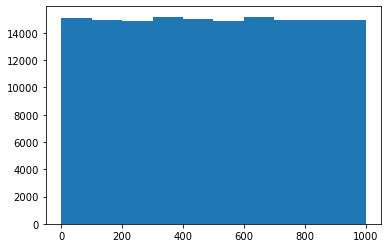

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(df_clean['Start ms'])

## Task 1 - User Overview analysis 


##### 1. Start by identifying the top 10 handsets used by the customers.

*  Variables:  Handset Type

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       150001 non-null  object        
 1   Start                           150000 non-null  datetime64[ns]
 2   Start ms                        150001 non-null  float64       
 3   End                             150000 non-null  datetime64[ns]
 4   End ms                          150001 non-null  float64       
 5   Dur. (ms)                       150001 non-null  float64       
 6   IMSI                            150001 non-null  float64       
 7   MSISDN/Number                   150001 non-null  float64       
 8   IMEI                            150001 non-null  float64       
 9   Last Location Name              148848 non-null  object        
 10  Avg RTT DL (ms)                 150001 non-null  float64

In [16]:
Top10_Handset=df_clean['Handset Type'].value_counts()
Top10_Handset.head(10)

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

In [17]:
# #find frequency of each 'Handset Type
# pd.crosstab(index=df_clean['Handset Type'], columns='count')

#### 2. Then, identify the top 3 handset manufacturers: Handsets frequencies and get top 3

* Variables:         Handset Manufacturer




In [18]:
Top3_Handset_Manufacturer=df_clean['Handset Manufacturer'].value_counts()
Top3_Handset_Manufacturer

Apple                                          59565
Samsung                                        40839
Huawei                                         34423
undefined                                       8987
Sony Mobile Communications Ab                    980
                                               ...  
Shenzhen New Chabridge Communication Co Ltd        1
M S Soha Enterprise                                1
Vastking Technology (Hk) Limited                   1
Mundo Reader S.L.                                  1
Honstech Communication Co Ltd                      1
Name: Handset Manufacturer, Length: 170, dtype: int64

In [19]:
Top3_Handset_Manufacturer.head(3)

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

#### 3. Next, identify the top 5 handsets per top 3 handset manufacturer
* Variables: Handset Type and Handset Manufacturer

* Creating subdasets for top 3 manufacturers


In [20]:
Top3HandsetApple = df_clean.loc[df_clean['Handset Manufacturer'] == "Apple"]
Top3HandsetSamsung = df_clean.loc[df_clean['Handset Manufacturer'] == "Samsung"]
Top3HandsetHuawei = df_clean.loc[df_clean['Handset Manufacturer'] == "Huawei"]
Top3HandsetHuawei.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
6,13114483501243799552,2019-04-13 08:41:59,612.0,2019-04-25 08:16:21,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9164567010589190,102.0,5.0,22.0,38.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,9785.0,316210.0,1.035262e+09,Huawei,Huawei Mate 20 Lite,33.0,655.0,1623509.0,1482.0,1837897.0,3068975.0,1838947.0,252032.0,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0
11,13114483557479700480,2019-04-15 11:33:39,626.0,2019-04-25 18:44:14,542.0,889834.0,2.082019e+14,3.366447e+10,8.600910e+13,T21335C,217.0,4.0,28305.0,6500.0,68.0,17.0,7.0,5.0,98.0,1.0,0.0,0.0,2623085.0,2632442.0,8.898349e+08,Huawei,Huawei B593S-22,5566.0,7852.0,829305.0,10046.0,7241855.0,1580541.0,1541381.0,807271.0,2805710.0,16817598.0,18094847.0,2029991.0,504604946.0,1063672.0,526987098.0,11382619.0,33691738.0,535118044.0
20,13042425955912400896,2019-04-17 00:35:20,363.0,2019-04-25 04:52:49,691.0,706649.0,2.082010e+14,3.365875e+10,8.654080e+13,T29714B,409.0,43.0,29501.0,10557.0,91.0,4.0,1.0,1.0,98.0,0.0,0.0,0.0,3813488.0,2505174.0,7.066493e+08,Huawei,Huawei E5180,14793.0,10565.0,3184530.0,9277.0,10719953.0,36395.0,141717.0,902776.0,15782415.0,9688165.0,18625220.0,14679856.0,373953102.0,574875.0,161357015.0,134689.0,26026033.0,422406937.0
25,13114483519088500736,2019-04-17 10:17:52,47.0,2019-04-24 23:27:28,907.0,652176.0,2.082017e+14,3.377042e+10,8.690840e+13,T76876B,63.0,4.0,22.0,35.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1109.0,47589.0,6.521769e+08,Huawei,Huawei P20 Pro,5.0,99.0,2868478.0,6873.0,8992480.0,2302073.0,112113.0,824843.0,18661053.0,4842355.0,10267242.0,6017869.0,447183598.0,8580676.0,316854859.0,8945069.0,31519758.0,488084964.0
30,13042425955912400896,2019-04-18 00:35:20,711.0,2019-04-25 04:52:49,691.0,620248.0,2.082010e+14,3.365875e+10,8.654080e+13,T29714B,273.0,22.0,26037.0,7205.0,89.0,5.0,2.0,2.0,98.0,1.0,0.0,0.0,2131832.0,1606322.0,6.202490e+08,Huawei,Huawei E5180,9763.0,6569.0,2370650.0,53206.0,2025553.0,967151.0,1803443.0,812075.0,1843883.0,15098966.0,12173853.0,10598373.0,366103099.0,13276512.0,195717525.0,14209340.0,55015623.0,386320481.0


In [21]:
Top3HandsetApple

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
22,7349883219580890112,2019-04-17 08:01:04,284.0,2019-04-25 17:02:58,918.0,723714.0,2.082017e+14,3.362124e+10,3.537991e+13,D14033B,22.0,1.0,49.0,52.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,20070.0,79273.0,723714634.0,Apple,Apple iPhone 6S (A1688),132.0,245.0,759834.0,47429.0,10830083.0,2924712.0,1781218.0,375213.0,5171749.0,16522963.0,19868319.0,9877484.0,536129472.0,4566629.0,450624422.0,13593409.0,47907839.0,574540675.0
48,13114483531236999168,2019-04-19 23:14:45,585.0,2019-04-25 02:22:14,171.0,443248.0,2.082017e+14,3.365014e+10,3.594851e+13,D73529C,33.0,6.0,49.0,49.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,40763.0,46327.0,443248586.0,Apple,Apple iPhone 6S (A1688),179.0,189.0,1533999.0,4020.0,4439790.0,228332.0,1167333.0,269355.0,19277029.0,15508907.0,3282987.0,16941656.0,261726685.0,6404212.0,784638708.0,14568202.0,53924684.0,291427823.0
51,7349883232516039680,2019-04-20 07:34:47,202.0,2019-04-25 11:52:26,683.0,447459.0,2.082010e+14,3.366276e+10,3.530681e+13,T10531C,27.0,2.0,64.0,86.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,241822.0,214993.0,447459481.0,Apple,Apple iPhone Se (A1723),1331.0,1327.0,119995.0,27749.0,6435177.0,3122056.0,2541480.0,96168.0,4111418.0,12164650.0,10621511.0,15051799.0,391455841.0,217287.0,127320483.0,15111856.0,45791565.0,415285422.0
52,13042425938623600640,2019-04-20 10:04:38,576.0,2019-04-25 00:01:43,669.0,395825.0,2.082014e+14,3.368430e+10,3.560881e+13,K73601A,34.0,5.0,66.0,87.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,134132.0,132703.0,395825093.0,Apple,Apple iPhone 8 (A1905),654.0,665.0,231468.0,56600.0,7263447.0,2884561.0,1474962.0,416380.0,11155402.0,15621467.0,17515549.0,6528927.0,113666563.0,11801555.0,400511816.0,11844221.0,49153711.0,151307391.0
54,7349883233111870464,2019-04-20 11:06:34,125.0,2019-04-25 04:03:50,726.0,406636.0,2.082017e+14,3.365807e+10,3.561351e+13,T62273B,28.0,0.0,51.0,61.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,83039.0,83168.0,406636601.0,Apple,Apple iPhone 6S (A1688),481.0,482.0,1046086.0,37511.0,4384239.0,677538.0,1223767.0,705222.0,14683108.0,4407263.0,12823737.0,8651430.0,559228930.0,8562020.0,480057381.0,14568332.0,37609316.0,593389867.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149992,13114483573367099392,2019-04-29 07:28:40,114.0,2019-04-30 07:04:20,724.0,84940.0,2.082014e+14,3.376127e+10,3.532701e+13,D78058B,37.0,4.0,23.0,40.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,26597.0,30281.0,84940610.0,Apple,Apple iPhone 6S (A1688),94.0,97.0,1717476.0,35240.0,3455682.0,3827662.0,60320.0,894557.0,22428728.0,14385815.0,6940672.0,6801943.0,35738570.0,7842728.0,808482329.0,12135519.0,45923464.0,70341448.0
149993,13114483573367199744,2019-04-29 07:28:41,79.0,2019-04-30 18:22:23,512.0,125622.0,2.082014e+14,3.362611e+10,3.573531e+13,D73542B,46.0,6.0,43.0,41.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,30493.0,35262.0,125622433.0,Apple,Apple iPhone Xr (A2105),100.0,108.0,2297830.0,10129.0,10844751.0,1615125.0,1803603.0,751975.0,18144703.0,8161828.0,20559422.0,20415237.0,569668054.0,1618788.0,168292600.0,11056036.0,43629118.0,623318363.0
149996,7277825670196

In [22]:
# Top 5 handsets for Apple
Top3HandsetApple['Handset Type'].value_counts().head(5)


Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64

In [23]:
# Top 5 handsets for Samsung
Top3HandsetSamsung['Handset Type'].value_counts().head(5)

Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64

In [24]:
# Top 5 handsets for Huawei
Top3HandsetHuawei['Handset Type'].value_counts().head(5)

Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64

#### 4. Make a short interpretation and recommendation to marketing teams

The top 3 manufactutrers of handsets are: Apple, Samsung and Huawei.
The Apple produced 59565 handsets, mainly being for Apple iPhone 6S (A1688) and Apple iPhone 6 (A1586)   with  9419 and 9023 products respectively.

The Samsung  produced 40839 handsets, dominated mainly by Samsung Galaxy S8 (Sm-G950F) and Samsung Galaxy A5 Sm-A520F  with 4520 and 3724 produced respectively.
The third one, was Huawei which produced 34423 handsets, with Huawei B528S-23A  and Huawei E5180 being main produced counting for 19752 and 2079 respectively.


# Box plot to check outliers
Summary statistics on bariables
Graphs of variables



### Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications. 

#### Aggregate per user the following information in the column


* number of xDR sessions per users


In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       150001 non-null  object        
 1   Start                           150000 non-null  datetime64[ns]
 2   Start ms                        150001 non-null  float64       
 3   End                             150000 non-null  datetime64[ns]
 4   End ms                          150001 non-null  float64       
 5   Dur. (ms)                       150001 non-null  float64       
 6   IMSI                            150001 non-null  float64       
 7   MSISDN/Number                   150001 non-null  float64       
 8   IMEI                            150001 non-null  float64       
 9   Last Location Name              148848 non-null  object        
 10  Avg RTT DL (ms)                 150001 non-null  float64

* Session duration per users


In [26]:
# bearer id	xDr session identifier
df_clean.groupby("MSISDN/Number")['Bearer Id'].count()

MSISDN/Number
3.360100e+10       1
3.360100e+10       1
3.360100e+10       1
3.360101e+10       1
3.360101e+10       2
                ... 
3.379000e+10       1
4.188282e+10    1066
3.197021e+12       1
3.370000e+14       1
8.823971e+14       1
Name: Bearer Id, Length: 106857, dtype: int64

In [56]:
df_clean.groupby("MSISDN/Number")['Bearer Id'].describe()

,count,unique,top,freq
MSISDN/Number,,,,
"33,601,001,722.00",1,1,13114483554762799104,1
"33,601,001,754.00",1,1,7349883260786089984,1
"33,601,002,511.00",1,1,7349883263388680192,1
"33,601,007,832.00",1,1,13042425972781099008,1
"33,601,008,617.00",2,2,7277825655840339968,1
...,...,...,...,...
"33,789,997,247.00",1,1,13114483558421200896,1
"41,882,819,545.03",1066,502,,562
"3,197,020,876,596.00",1,1,7277825624788950016,1


In [58]:
df_clean["MSISDN/Number"].describe()

count               150,001.00
mean         41,882,819,545.03
std       2,438,731,270,479.18
min          33,601,001,722.00
25%          33,651,508,781.00
50%          33,663,797,508.00
75%          33,684,730,950.00
max     882,397,108,489,451.00
Name: MSISDN/Number, dtype: float64


* the total download (DL) and upload (UL) data per Users


In [59]:
# TCP DL Retrans. Vol (Bytes)	TCP volume of Downlink packets detected as retransmitted (bytes)
# TCP UL Retrans. Vol (Bytes)	TCP volume of Uplink packets detected as retransmitted (bytes)


# Avg RTT DL (ms) 
# Avg RTT UL (ms)

df_clean.groupby("MSISDN/Number")['Avg RTT DL (ms)'].sum()

MSISDN/Number
33,601,001,722.00             46.00
33,601,001,754.00             30.00
33,601,002,511.00            109.80
33,601,007,832.00             69.00
33,601,008,617.00            114.00
                            ...    
33,789,997,247.00             34.00
41,882,819,545.03        307,586.21
3,197,020,876,596.00         109.80
337,000,037,000,919.00       109.80
882,397,108,489,451.00       109.80
Name: Avg RTT DL (ms), Length: 106857, dtype: float64

In [60]:
df_clean['Avg RTT DL (ms)'].describe()

count   150,001.00
mean        109.80
std         559.34
min           0.00
25%          35.00
50%          54.00
75%         109.80
max      96,923.00
Name: Avg RTT DL (ms), dtype: float64

In [61]:
df_clean.groupby("MSISDN/Number")['Avg RTT UL (ms)'].sum()

MSISDN/Number
33,601,001,722.00             0.00
33,601,001,754.00             1.00
33,601,002,511.00            17.66
33,601,007,832.00            15.00
33,601,008,617.00             5.00
                            ...   
33,789,997,247.00             6.00
41,882,819,545.03        21,939.96
3,197,020,876,596.00         17.66
337,000,037,000,919.00       17.66
882,397,108,489,451.00       17.66
Name: Avg RTT UL (ms), Length: 106857, dtype: float64

In [62]:
df_clean['Avg RTT UL (ms)'].describe()

count   150,001.00
mean         17.66
std          76.53
min           0.00
25%           3.00
50%           7.00
75%          17.66
max       7,120.00
Name: Avg RTT UL (ms), dtype: float64


* the total data volume (in Bytes) during this session for each application per Users

In [63]:
# Variables: 
# Total DL (Bytes)	Data volume (in Bytes) received by the MS during this session (IP layer + overhead)
# Total UL (Bytes)	Data volume (in Bytes) sent by the MS during this session (IP layer + overhead)


df_clean.groupby("MSISDN/Number")['Total DL (Bytes)'].sum()

MSISDN/Number
33,601,001,722.00            842,637,466.00
33,601,001,754.00            120,755,184.00
33,601,002,511.00            556,659,663.00
33,601,007,832.00            401,993,172.00
33,601,008,617.00          1,363,130,417.00
                                ...        
33,789,997,247.00            444,575,092.00
41,882,819,545.03        487,378,285,756.08
3,197,020,876,596.00         194,828,056.00
337,000,037,000,919.00       539,634,985.00
882,397,108,489,451.00        78,697,597.00
Name: Total DL (Bytes), Length: 106857, dtype: float64

In [64]:
df_clean['Total DL (Bytes)'].describe()

count       150,001.00
mean    454,643,430.08
std     244,142,060.57
min       7,114,041.00
25%     243,107,173.00
50%     455,840,911.00
75%     665,705,138.00
max     902,969,616.00
Name: Total DL (Bytes), dtype: float64

In [65]:
df_clean.groupby("MSISDN/Number")['Total UL (Bytes)'].sum()

MSISDN/Number
33,601,001,722.00            36,053,108.00
33,601,001,754.00            36,104,459.00
33,601,002,511.00            39,306,820.00
33,601,007,832.00            20,327,526.00
33,601,008,617.00            94,280,527.00
                                ...       
33,789,997,247.00            35,732,243.00
41,882,819,545.03        44,366,423,488.29
3,197,020,876,596.00         37,295,915.00
337,000,037,000,919.00       56,652,839.00
882,397,108,489,451.00       60,456,049.00
Name: Total UL (Bytes), Length: 106857, dtype: float64

In [66]:
df_clean['Total UL (Bytes)'].describe()

count      150,001.00
mean    41,121,206.29
std     11,276,348.93
min      2,866,892.00
25%     33,222,029.00
50%     41,143,242.00
75%     49,034,238.00
max     78,331,311.00
Name: Total UL (Bytes), dtype: float64

Fields	Description
bearer id	xDr session identifier
Dur. (ms)	Total Duration of the xDR (in ms)


In [67]:
df_clean["Bearer Id"].value_counts()

                        991
13042425979269199872     16
13042425965944199168     10
13042425972278300672      9
13042425978774599680      9
                       ... 
13042425959245500416      1
13114483564761300992      1
7277825665743110144       1
7277825669917429760       1
13114483555887499264      1
Name: Bearer Id, Length: 134709, dtype: int64

In [68]:
df_clean["Bearer Id"].describe()

count     150001
unique    134709
top             
freq         991
Name: Bearer Id, dtype: object

### Task 1.2 - Conduct an exploratory data analysis on those data

* Ensure that you identify and treat all missing values and outliers in the dataset by replacing by the mean of the corresponding column.

In [32]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

def format_float(value):
    return f'{value:,.2f}'

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]


###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()
    
pd.options.display.float_format = format_float

#### You’re expected to report about the following using  python script and slide  :


* Describe all  relevant variables and associated data types (slide). 


* Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.

In [34]:
df_clean.describe()

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,"150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00"
mean,499.19,498.80,"104,608.56","208,201,639,651,673.78","41,882,819,545.03","48,474,547,977,653.76",109.80,17.66,"13,300.05","1,770.43",92.84,3.07,1.72,1.61,98.53,0.78,0.15,0.08,"1,829,176.87","1,408,879.97","104,609,105.55","3,719.79","4,022.08","1,795,321.77","32,928.43","5,750,752.62","2,056,541.93","1,791,728.87","467,373.44","11,634,072.50","11,009,410.13","11,626,851.72","11,001,754.82","422,044,702.60","8,288,398.11","421,100,544.19","8,264,799.42","41,121,206.29","454,643,430.08"
std,288.61,288.10,"81,037.35","21,447,224,608.90","2,438,731,270,479.18","22,373,590,654,759.30",559.34,76.53,"23,971.80","4,625.34",13.01,6.20,4.15,4.82,4.62,3.22,1.62,1.29,"5,696,376.48","4,643,215.12","81,037,341.45","9,148.50","10,133.43","1,035,482.28","19,006.18","3,309,097.02","1,189,916.93","1,035,839.51","269,969.31","6,710,568.85","6,345,423.35","6,725,218.03","6,359,489.76","243,967,494.35","4,782,699.66","243,205,009.81","4,769,003.69","11,276,348.93","244,142,060.57"
min,0.00,0.00,"7,142.00","204,047,108,489,451.00","33,601,001,722.00","440,015,202,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"7,142,988.00",1.00,1.00,12.00,0.00,207.00,3.00,14.00,2.00,53.00,105.00,42.00,35.00,"2,516.00",59.00,"3,290.00",148.00,"2,866,892.00","7,114,041.00"
25%,250.00,251.00,"57,442.00","208,201,401,264,956.00","33,651,508,781.00","35,462,609,538,986.00",35.00,3.00,43.00,47.00,91.00,0.00,0.00,0.00,99.00,0.00,0.00,0.00,"14,878.00","21,540.00","57,442,058.00",88.00,107.00,"899,148.00","16,448.00","2,882,393.00","1,024,279.00","892,793.00","233,383.00","5,833,501.00","5,517,965.00","5,777,156.00","5,475,981.00","210,473,253.00","4,128,476.00","210,186,872.00","4,145,943.00","33,222,029.00","243,107,173.00"
50%,499.00,500.00,"86,399.00","208,201,546,359,072.00","33,663,797,508.00","35,722,409,972,293.00",54.00,7.00,63.00,63.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,"39,305.00","46,794.00","86,399,983.00",205.00,220.00,"1,794,369.00","32,920.00","5,765,829.00","2,054,573.00","1,793,505.00","466,250.00","11,616,019.00","11,013,447.00","11,642,217.00","10,996,384.00","423,408,104.00","8,291,208.00","421,803,006.00","8,267,071.00","41,143,242.00","455,840,911.00"
75%,749.00,750.00,"132,430.00","208,201,771,607,314.00","33,684,730,950.00","86,119,704,277,453.00",109.80,17.66,"19,710.00","1,120.00",100.00,4.00,1.00,1.00,100.00,0.00,0.00,0.00,"679,611.00","599,114.00","132,430,686.00","2,765.00","2,560.00","2,694,938.00","49,334.00","8,623,552.00","3,088,454.00","2,689,327.00","700,440.00","17,448,518.00","16,515,562.00","17,470,478.00","16,507,268.00","633,174,167.00","12,431,624.00","631,691,786.00","12,384,148.00","49,034,238.00","665,705,138.00"
max,999.00,999.00,"1,859,336.

* Conduct a Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable and provide useful interpretation. 

In [35]:
missing_values_table(df_clean)

Your selected dataframe has 45 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Last Location Name,1153,0.80,object
Handset Manufacturer,572,0.40,object
Handset Type,572,0.40,object
Start,1,0.00,datetime64[ns]
End,1,0.00,datetime64[ns]


In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       150001 non-null  object        
 1   Start                           150000 non-null  datetime64[ns]
 2   Start ms                        150001 non-null  float64       
 3   End                             150000 non-null  datetime64[ns]
 4   End ms                          150001 non-null  float64       
 5   Dur. (ms)                       150001 non-null  float64       
 6   IMSI                            150001 non-null  float64       
 7   MSISDN/Number                   150001 non-null  float64       
 8   IMEI                            150001 non-null  float64       
 9   Last Location Name              148848 non-null  object        
 10  Avg RTT DL (ms)                 150001 non-null  float64

##### Graphical representation of data

* Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options for each variable and interpret your findings.

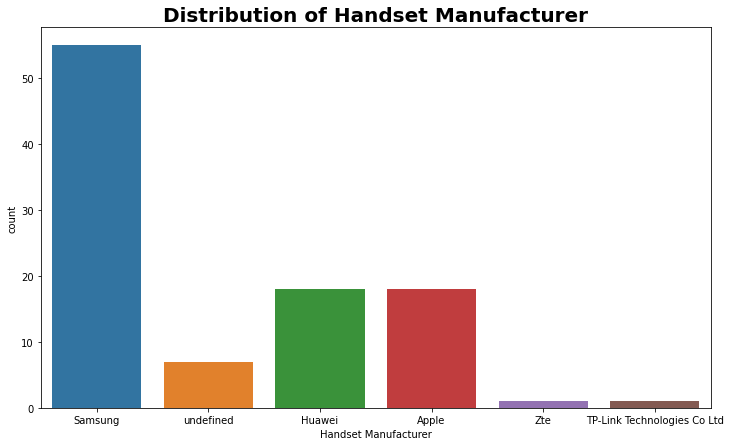

In [37]:
# Randomly selecting some rows for visualization
#plot_count(df_clean.sample(n=100), "Handset Manufacturer")
plot_count(df_clean.head(100), "Handset Manufacturer")

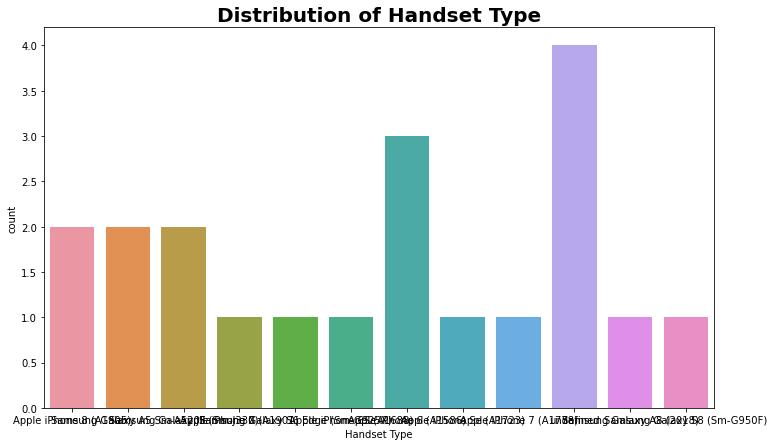

In [38]:
plot_count(df_clean.sample(20), "Handset Type")

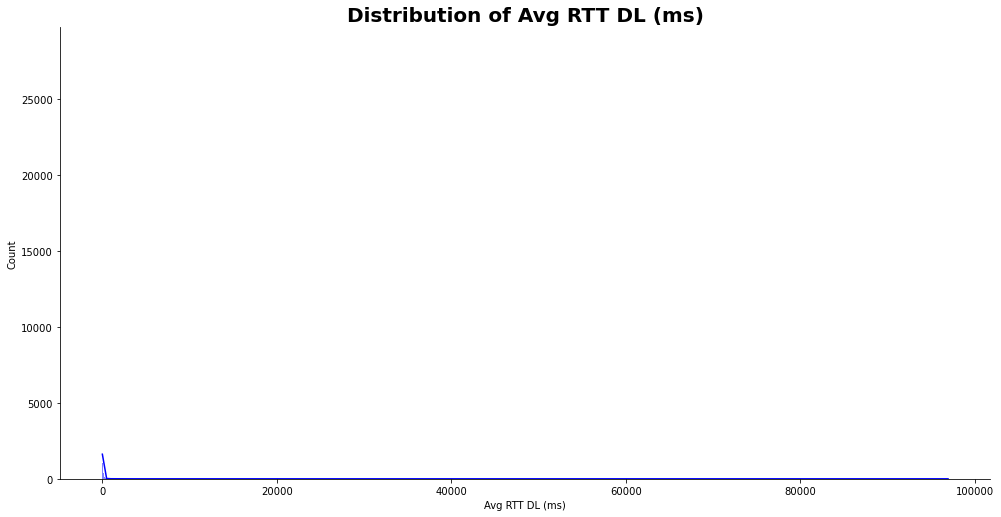

In [39]:
plot_hist(df_clean, "Avg RTT DL (ms)", "blue")


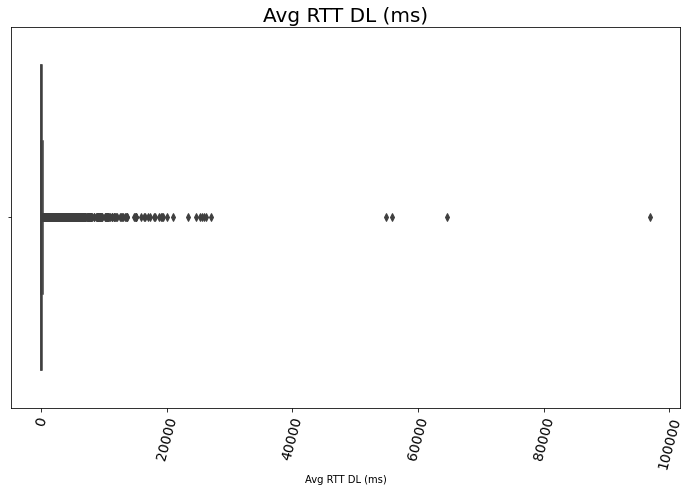

In [40]:
plot_box(df_clean, "Avg RTT DL (ms)", "Avg RTT DL (ms)")

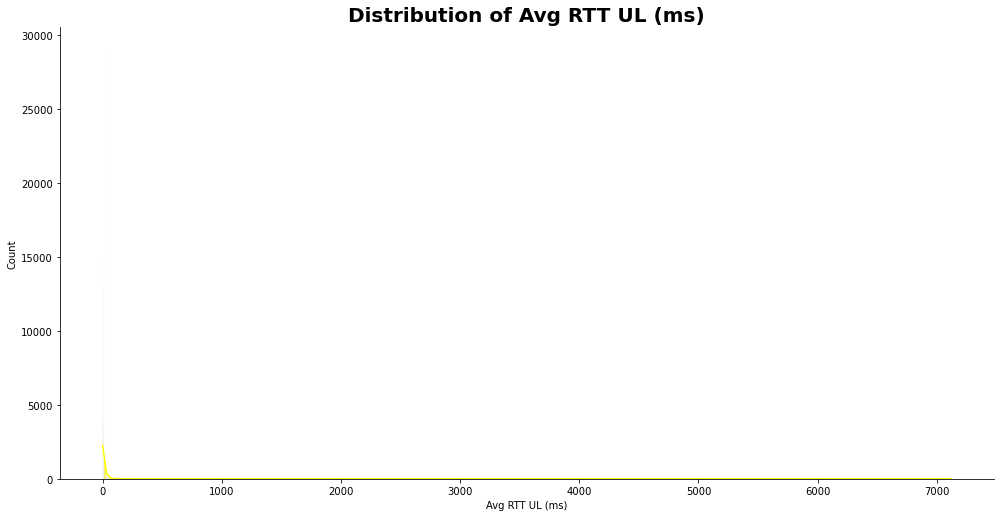

In [41]:
plot_hist(df_clean, "Avg RTT UL (ms)", "yellow")

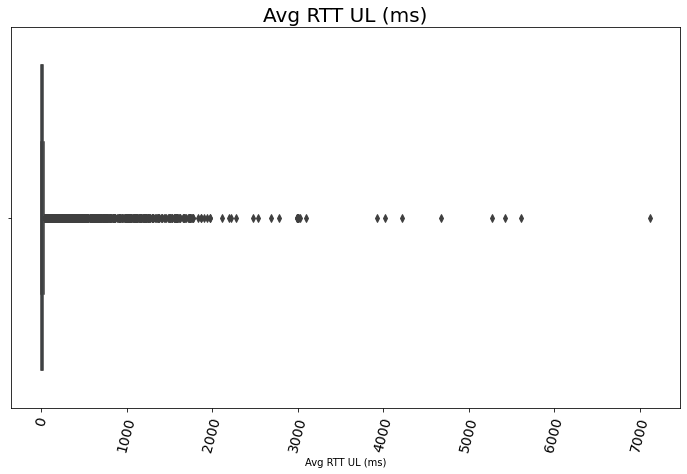

In [42]:
plot_box(df_clean, "Avg RTT UL (ms)", "Avg RTT UL (ms)")

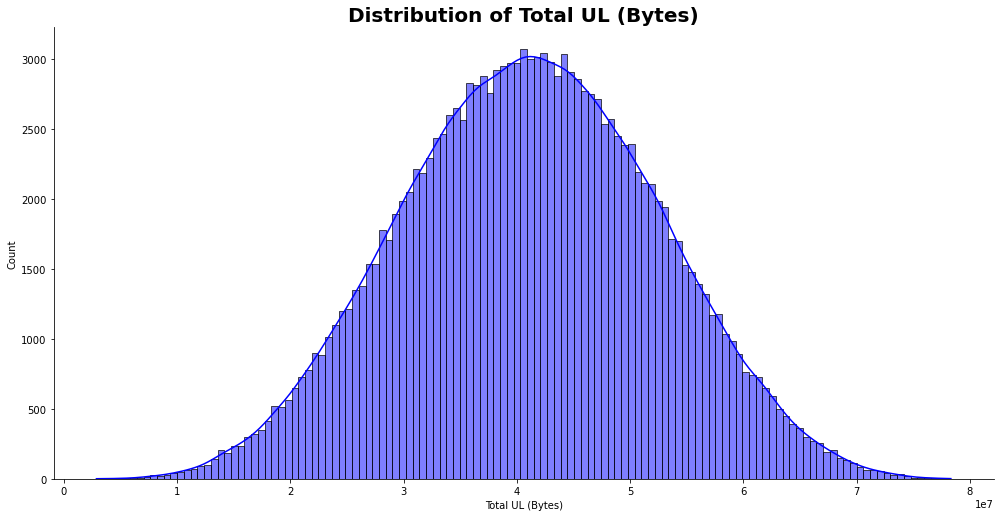

In [43]:
plot_hist(df_clean, "Total UL (Bytes)", "blue")

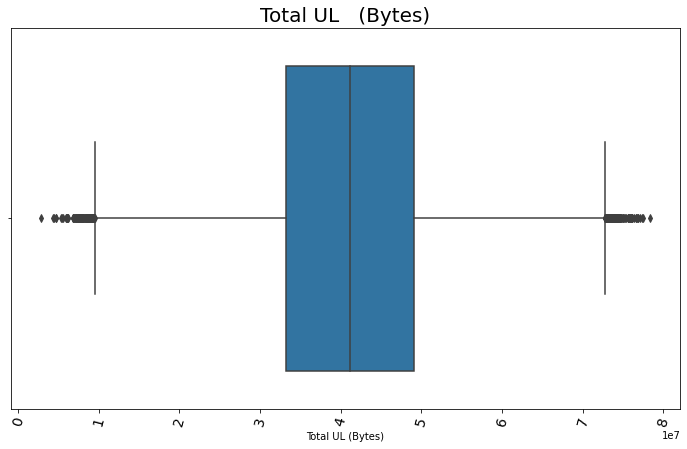

In [44]:
plot_box(df_clean, "Total UL (Bytes)", "Total UL   (Bytes)")

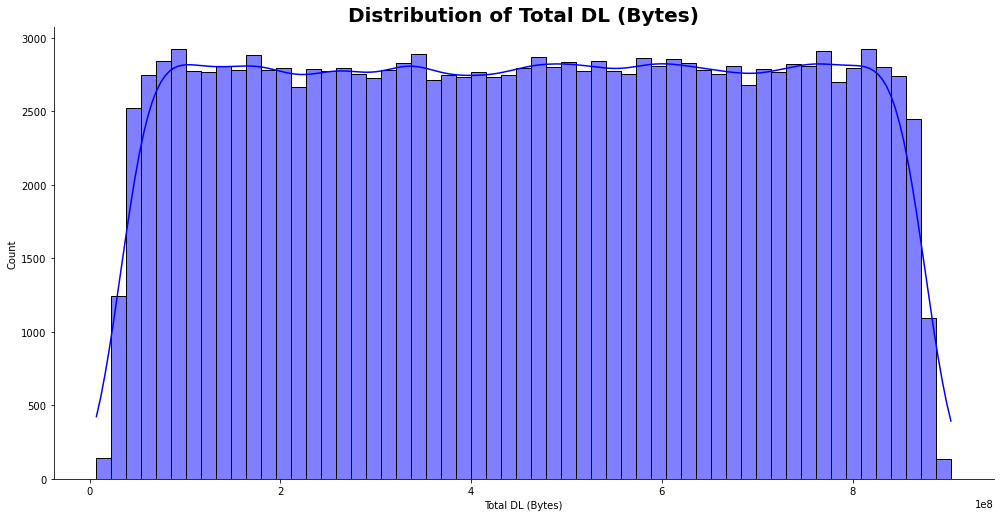

In [45]:
plot_hist(df_clean, "Total DL (Bytes)", "blue")

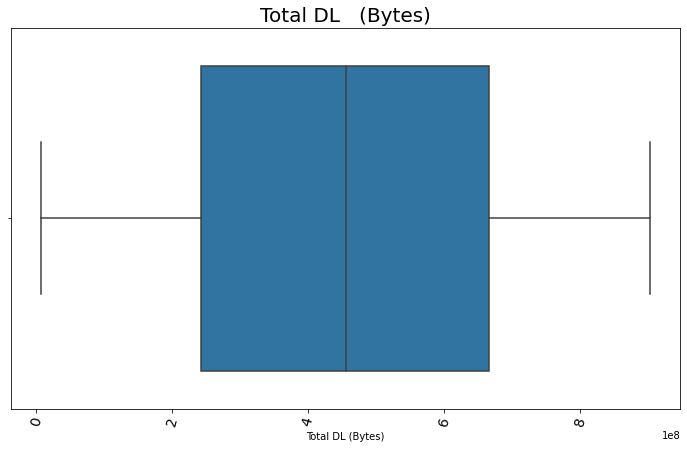

In [46]:
plot_box(df_clean, "Total DL (Bytes)", "Total DL   (Bytes)")

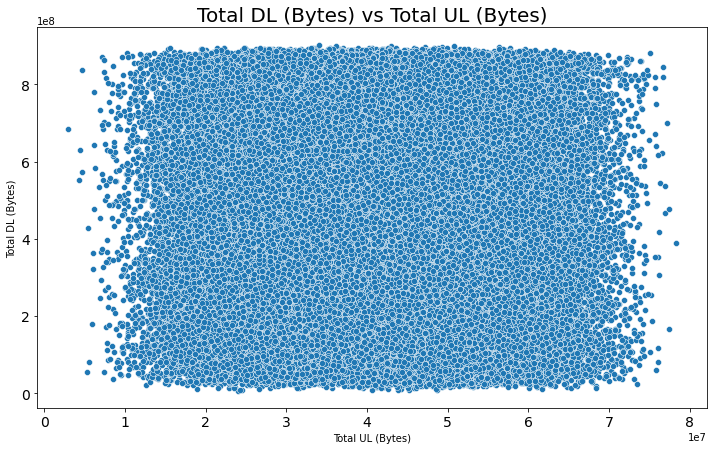

In [47]:
# Scatter plt

plt.figure(figsize=(12, 7))
sns.scatterplot(data = df_clean, x="Total UL (Bytes)", y="Total DL (Bytes)")
plt.title( "Total DL (Bytes) vs Total UL (Bytes)", size=20)
plt.xticks(fontsize=14)
plt.yticks( fontsize=14)
plt.show()

* Bivariate Analysis – explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings. 

In [48]:
# pd.crosstab(df_clean["Total UL (Bytes)"], df_clean["Total DL (Bytes)"])


* Variable transformations – segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class.

* Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data 

In [49]:
df_clean_corr = df_clean[["Google DL (Bytes)", "Google UL (Bytes)", "Email DL (Bytes)", "Email UL (Bytes)", "Youtube DL (Bytes)", "Youtube UL (Bytes)", "Netflix DL (Bytes)", "Netflix UL (Bytes)", "Gaming DL (Bytes)", "Gaming UL (Bytes)", "Other DL (Bytes)", "Other UL (Bytes)"]]
df_clean_corr

,Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
0,"1,634,479.00","1,271,433.00","3,563,542.00","137,762.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00"
1,"3,493,924.00","920,172.00","629,046.00","308,339.00","20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00"
2,"8,535,055.00","1,694,064.00","2,690,151.00","672,973.00","19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00"
3,"9,023,734.00","2,788,027.00","1,439,754.00","631,229.00","21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00"
4,"6,248,284.00","1,500,559.00","1,936,496.00","173,853.00","15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","527,707,248.00","3,529,801.00","550,709,500.00","13,910,322.00"
...,...,...,...,...,...,...,...,...,...,...,...,...
149996,"9,967,603.00","2,817,311.00","57,639.00","633,237.00","16,191,667.00","11,763,428.00","17,883,703.00","19,678,161.00","526,609,673.00","9,197,207.00","3,264,510.00","13,487,416.00"
149997,"2,229,420.00","2,185,941.00","1,954,414.00","167,304.00","13,877,234.00","8,288,284.00","19,350,146.00","21,293,148.00","626,893,062.00","4,735,033.00","712,180,387.00","2,457,758.00"
149998,"3,850,890.00","2,734,579.00","1,525,734.00","532,543.00","22,660,510.00","1,855,903.00","9,963,942.00","5,065,760.00","553,539,484.00","13,394,316.00","121,100,856.00","11,314,729.00"
149999,"4,189,773.00","3,567,494.00","2,228,270.00","622,644.00","8,817,106.00","8,305,402.00","3,322,253.00","13,172,589.00","352,536,971.00","2,529,475.00","814,713,113.00","1,406,930.00"


In [50]:
corrMatrix = df_clean_corr.corr()
corrMatrix

,Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
Google DL (Bytes),1.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00
Google UL (Bytes),-0.00,1.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00
Email DL (Bytes),-0.00,-0.00,1.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00
Email UL (Bytes),0.00,-0.00,0.00,1.00,-0.00,-0.01,-0.00,0.00,-0.00,0.01,-0.00,0.00
Youtube DL (Bytes),0.00,0.00,0.00,-0.00,1.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00
Youtube UL (Bytes),0.00,0.00,-0.00,-0.01,0.00,1.00,0.00,0.00,-0.00,0.00,0.00,-0.00
Netflix DL (Bytes),0.00,-0.00,0.00,-0.00,0.00,0.00,1.00,0.00,-0.00,-0.00,-0.01,-0.00
Netflix UL (Bytes),-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,1.00,-0.00,-0.00,-0.01,-0.00
Gaming DL (Bytes),-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,0.00,-0.00,-0.00
Gaming UL (Bytes),-0.00,-0.00,-0.00,0.01,-0.00,0.00,-0.00,-0.00,0.00,1.00,-0.00,-0.01


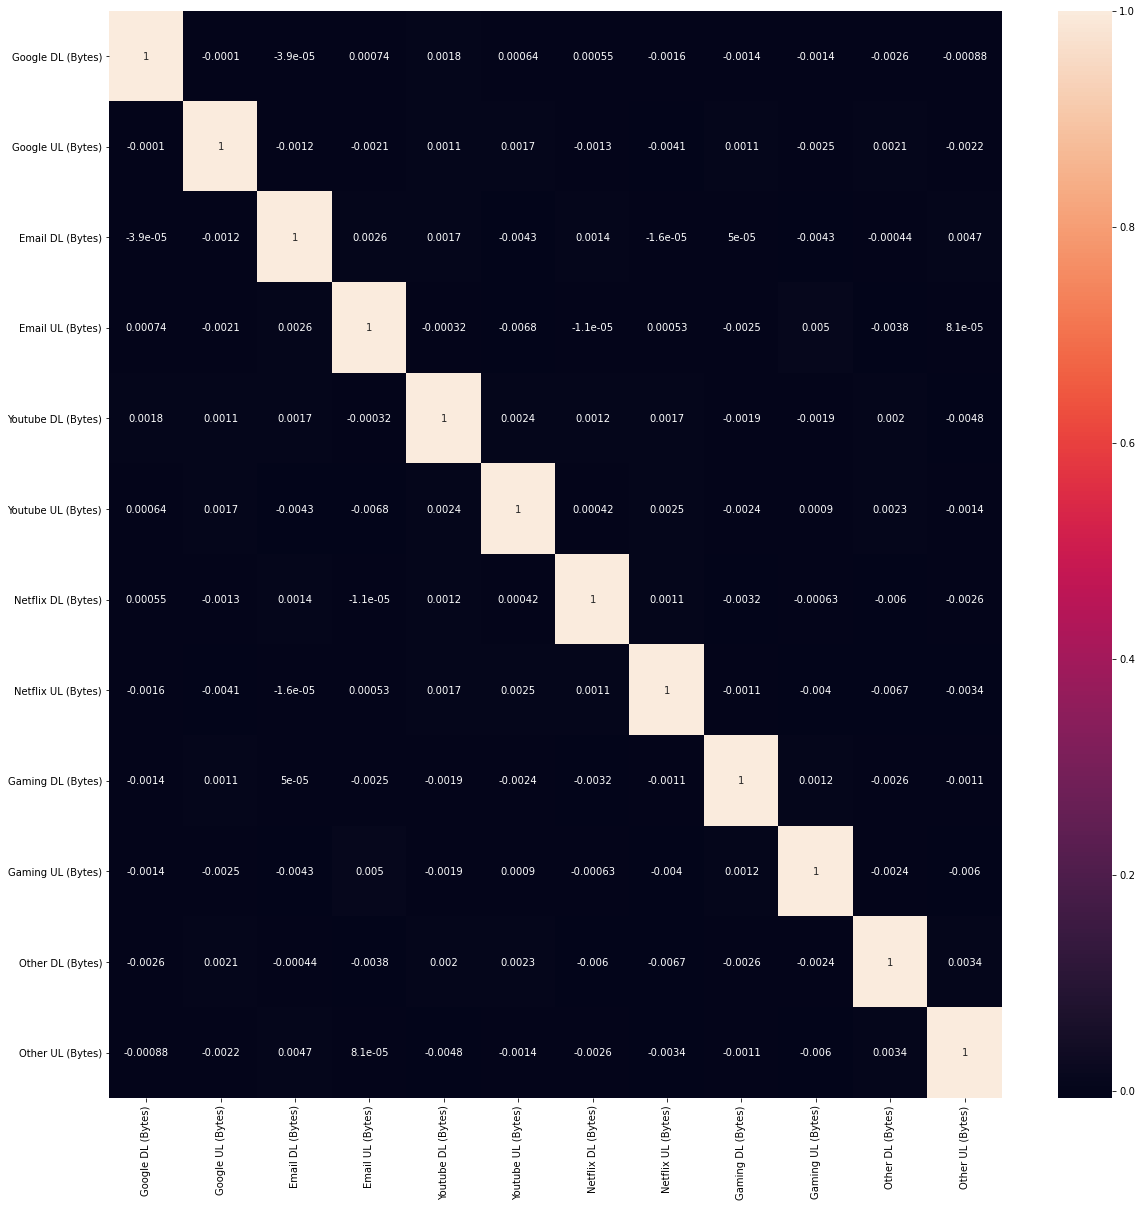

In [51]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

sn.heatmap(corrMatrix, annot=True)
plt.show()

Results interpretation: 
According to this hitmap of the correlation, we can see that there is no significant correlation between the data (variables) and most of them are negativelly correlated, where increase in ione corresponds to the decrease of the other.

* Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points-maximum). 


In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_clean_corr)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [53]:
principalDf

,principal component 1,principal component 2,principal component 3
0,"50,933,883.65","283,388,270.73","-2,360,112.26"
1,"-139,796,994.78","-162,816,753.22","8,904,379.94"
2,"177,544,331.99","75,017,745.23","7,864,089.49"
3,"-244,011,482.92","-436,468,541.05","4,815,258.49"
4,"-55,482,460.98","-157,750,069.11","6,197,810.76"
...,...,...,...
149996,"-239,983,406.98","357,673,342.92","7,276,919.58"
149997,"-94,077,213.22","-343,274,804.20","8,249,609.34"
149998,"-225,384,472.52","237,679,981.55","1,073,785.70"
149999,"198,791,045.47","-346,763,006.77","-8,651,606.72"


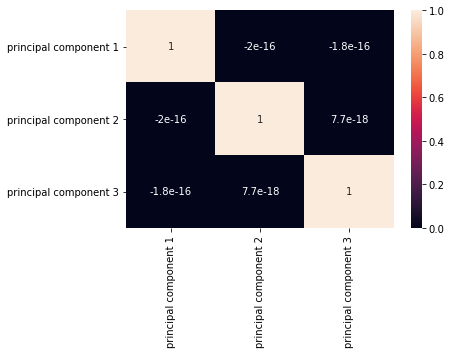

In [54]:
sn.heatmap(principalDf.corr(), annot=True)
plt.show()

## Task 2 - User Engagement analysis


In the current dataset you’re expected to track the user’s engagement using the following engagement metrics: 
* sessions frequency 
* the duration of the session 
* the sessions total traffic (download and upload (bytes))


Task 2.1 - Based on the above submit python script and slide :

* Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 


* Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. 


* Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.

* Aggregate user total traffic per application and derive the top 10 most engaged users per application


* Plot the top 3 most used applications using appropriate charts.  


* Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 


* What is the optimized value of k (use elbow method for this)?  


* Interpret your findings. 

In [55]:
# fill missing with ffill method for columns (diag_1, diag_2, diag_3)

def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]


def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

df_clean['diag_1'] = fix_missing_ffill(df_clean, 'diag_1')
df_clean['diag_2'] = fix_missing_ffill(df_clean, 'diag_2')
df_clean['diag_3'] = fix_missing_ffill(df_clean, 'diag_3')

# fill 'race' column with mode 
df_clean['race'] = df_clean['race'].fillna(df_clean['race'].mode()[0])

KeyError: 'diag_1'

Other missing columns can be fixed based on your understanding, you can decide to drop or fill using appropriate methods. Whichever you decide, explain your reasons  

## Transforming Data

**Scaling and Normalization**

Scaling vs. Normalization: What's the difference?

One of the reasons that it's easy to get confused between scaling and normalization is because the terms are sometimes used interchangeably and, to make it even more confusing, they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that:

    - in scaling, you're changing the range of your data, while
    - in normalization, you're changing the shape of the distribution of your data.

Scaling

This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points are, like support vector machines (SVM) or k-nearest neighbors (KNN). With these algorithms, a change of "1" in any numeric feature is given the same importance.

For example, you might be looking at the prices of some products in both Yen and US Dollars. One US Dollar is worth about 100 Yen, but if you don't scale your prices, methods like SVM or KNN will consider a difference in price of 1 Yen as important as a difference of 1 US Dollar! This clearly doesn't fit with our intuitions of the world. With currency, you can convert between currencies. But what about if you're looking at something like height and weight? It's not entirely clear how many pounds should equal one inch (or how many kilograms should equal one meter).




In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(5)

In [ ]:
original_data[0].min(), original_data[0].max()

In [ ]:
count, bins, ignored = plt.hist(original_data, 14)
plt.show()

In [ ]:
# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
scaler(original_data)

Normalization

Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

    Normal distribution: Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, you'll normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

The method you will be using to normalize here is called the Normalizer method from sklearn. Let's take a quick peek at what normalizing some data looks like:

In [ ]:
from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")

normalizer(original_data)

In [ ]:
# check datatypes
df_clean.info()

In [ ]:
def fix_age(col):
    weight = [ x.replace( '[', '' ).replace( ')', '' ) for x in col.fillna('') ]
    new_age = [ ( ( int(i.split('-')[0] ) + int( i.split('-')[1] ) ) / 2)  for i in weight ]
    return weight, new_age

df['age_group'], df_clean['fix_age'] = fix_weight(df_clean['age'])

In [ ]:

df_clean['diag_1'] = pd.to_numeric(df_clean['diag_1'], errors='coerce')
df_clean['diag_2'] = pd.to_numeric(df_clean['diag_2'], errors='coerce')
df_clean['diag_3'] = pd.to_numeric(df_clean['diag_3'], errors='coerce')


In [ ]:
df_clean.info()

In [ ]:
df_clean['fix_age'].unique()

In [ ]:
   
df_clean['age'] = [ ((int(i.split('-')[0]) + int(i.split('-')[1])) / 2)  for i in df_clean['fix_age']]

## Utility Functions

In [ ]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

def format_float(value):
    return f'{value:,.2f}'

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    
    return df[bytes_data]

pd.options.display.float_format = format_float

## Extracting Data

In [ ]:
db['readmitted'].value_counts()

In [ ]:
percent_missing(df_clean)

In [ ]:
missing_values_table(df_clean)

In [ ]:
def map_readmitted(col):
    readmitted_map = {'NO' : 'NO', '>30': 'YES', '<30': 'YES'}
    return col.map(readmitted_map)

db['fix_readmitted'] = map_readmitted(db['readmitted'])

In [ ]:
# unique encounter id
db['change'].unique()

In [ ]:
db.shape

In [ ]:
pd.set_option('max_column', None)
df = pd.read_excel("data/Week2_challenge_data_source.xlsx", engine = 'openpyxl')
df.head()